## Oppstart

In [1]:
!curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

In [2]:
from module_update import update, css

In [3]:
css()

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Note that the file `nbtext.py` will be overwritten in the code below

This is probably ok, though. If not, change `update('nbtext', overwrite = True)` to `update('nbtext', overwrite = False)` and the file will stay unchanged. 


In [26]:
update('graph_networkx_louvain')
update('nbtext', overwrite=True)
update('token_map')
import nbtext as nb
import token_map as tm
from nbtext import get_urn, make_graph, get_urn, relaterte_ord, navn, totals
import graph_networkx_louvain as gnl
import pandas as pd
%matplotlib inline

plot = lambda x,  lw=3, alpha= 0.7: x.plot(figsize=(15,6), lw=lw, alpha=alpha)


Updated file `D:\Documents\GitHub\NER\graph_networkx_louvain.py`

Updated file `D:\Documents\GitHub\NER\nbtext.py`

Updated file `D:\Documents\GitHub\NER\token_map.py`

## Navn i bøker


Vi søker etter navn i en bok, og en serie av bøker.

Kommandoene er:
1. `names` henter et sett med forslag til navn, fra nbtext
1. `show_names` gir en oversikt over funnene, fra token_map
1. `names_to_token_map_file` lagrer navneforslagene til en excelfil (eller csv) for redigering (token_map)
1. `read_token_map_file` henter redigert fil tilbake for analyse (token_map)
1. `character_network` lager graf for navnene (token_map)
1. `show_graph`  tegner grafen (fra graph_networkx_louvain)
1. `show_communities` viser clustre i grafen (graph_networkx_louvain)


# Eksempel

I eksemplet ser vi først på en tilfeldig bok, deretter mulighetene for å gjøre det samme med et helt korpus.

## Korpus

Bygg først et korpus, enten fra `

In [21]:
korpus = nb.book_corpus(author='hamsun%')

In [19]:
korpus = nb.restore_metadata_from_excel('metadatafil.xls')

filen metadatafil.xls ble ikke funnet


## Sjekk innholdet

Gjør noen søk for å se at alt er ok. Konkordanser er fine til det.

In [18]:
nb.urn_concordance(word = 'arbeid', urns = list(korpus['urn']))

"Bygdebarn, Hamsun, Marie, 1969",glatte saker som det intet,arbeid,"var med , nei også"
"Bygdebarn, Hamsun, Marie, 1969",tid på en gård forefallende,arbeid,. Svar pr. omgående .
"Bygdebarn, Hamsun, Marie, 1969",V % mann til samme,arbeid,? For til tross for
"Bygdebarn, Hamsun, Marie, 1969",neste dag var Henry i,arbeid,sammen med Einar . Det
"Bygdebarn, Hamsun, Marie, 1969",i sterkt,arbeid,med å renske ut røtter
"Bygdebarn, Hamsun, Marie, 1974",Det hadde vært et svært,arbeid,"å bygge hyttene , for"
"Bygdebarn, Hamsun, Marie, 1974",Det hadde vært flere dagers,arbeid,", og de hadde forsømt"


## Navn

Finn forslag til navn med `names`. Se på dem med `show_names`. Her er det muligheter til å skru litt på parametrene. Hvis ratioen skrus ned fjernes en del ord, og om cutoff settes høyere vil også enkelte navneforslag kunne forsvinne.

In [22]:
korpus['urn'][0]

2008061104048

In [41]:
navn = nb.names(int(korpus['urn'][3]), ratio=0.2, cutoff=2)
tm.show_names(navn)

Lag 1

    Theodor - 535
    Willatz - 304
    Holmengrå - 247
    Bårdsen - 233
    Segelfoss - 187
    Dem - 177
    Mariane - 177
    Lars - 175
    Bua - 162
    Rasch - 157
    Julius - 150
    Manuelsen - 138
    Deres - 119
    Nils - 107
    Per - 90
    Dokker - 85
    Holmsen - 71
    Irgens - 66
    Lassen - 66
    Johan - 63
    Konrad - 61
    Clara - 60
    Didriksen - 54
    Bertel - 51
    Muus - 48
    Pauline - 44
    Jensen - 43
    Tidende - 41
    Landmarck - 40
    Holmengrås - 39
    Aslak - 37
    Gottfred - 34
    Martin - 34
    Max - 27
    Sibylle - 26
    Coldevin - 25
    Kornelius - 24
    Sagvika - 23
    Theodors - 20
    Larsens - 19
    Øine - 18
    Ura - 17
    Flaghaugen - 16
    Utvær - 15
    Amerika - 14
    Kristiania - 14
    Vælta - 14
    Lydia - 13
    Tobias - 12
    Mexico - 11
    Guds - 10
    Katrina - 10
    Kristine - 10
    Raschs - 10
    Holmsens - 9
    Samlede - 9
    Hybrecht - 8
    Manuelsens - 8
    Tykje - 8
    Vel - 8
   

Listen trenger litt redigering, og sammenslåing.

In [46]:
"hans".startswith(
'ha')

True

In [61]:
import os
from token_map import token_map

def names_to_token_map_file(wp, filename='', orient='column'):
    """Save token map to file for editing, exit if file exists"""
    
    # check  exit conditions
    if filename != '':
        if os.path.exists(filename):
            print('filen {f} eksisterer - prøve et nytt filnavn'.format(f=filename))
            return 
    else:
        print('angi et filnavn')
        return
        
    # if all ok go ahead
    
    table_names = dict()
    print(wp)
    tmap = token_map(wp)
    ##print(tmap)
    for (name, target) in tmap:
        x_str = ' '.join(target)
        y_str = ' '.join(name)
        if x_str in table_names:
            table_names[x_str].append(y_str)
        else:
            table_names[x_str] = [y_str]
    
    dfs = []
    for x in table_names:
        dfs.append( pd.DataFrame({x:table_names[x]}))
    df = pd.concat(dfs, axis=1)
    if orient == 'row':    
        df = df.transpose()
    rv = True
    if filename.endswith('csv'):
        df.to_csv(filename)
    elif filename.endswith('xls'):
        df.to_excel(filename, index = False)
    else:
        rv = df
    return rv

def read_token_map_file(filename, sep=', ', orient = 'column'):
    """Read a token map from file, either xls or csv"""
    
    if filename.endswith('xls'):
        res = pd.read_excel(filename, index_col=0 ).dropna(how='all').fillna('')
    elif filename.endswith('csv'):
        res = pd.read_csv(filename, sep=sep, index_col=0).dropna(how='all').fillna('')
    if orient.startswith('row'):
        res = res.transpose()
    result = []
    for x in res:
        xt = tuple(x.split())
        for value in res[x]:
            vt = tuple(value.split())
            if vt != ():
                result.append((vt, xt))
    return result

In [45]:
tm.read_token_map_file??

In [49]:
names_to_token_map_file(navn, filename="en_bok.xls")

filen en_bok.xls eksisterer - prøve et nytt filnavn


### Redigeringsaktivitet
Her går vi til excel (eller openoffice eller libreoffice eller ...) og redigerer navenene. NÅr alt er ferdig er det bare å gå tilbake til notebooken, hente frem redigert fil og fortsette analysen.

In [50]:
redigerte_navn = read_token_map_file("en_bok.xls")

In [56]:
redigerte_navn

[(('Aslak',), ('Aslak',)),
 (('Bertel',), ('Bertel',)),
 (('Bua',), ('Bua',)),
 (('Bårdsen',), ('Bårdsen',)),
 (('Bårdsens',), ('Bårdsen',)),
 (('Clara',), ('Clara',)),
 (('Claras',), ('Clara',)),
 (('Coldevin',), ('Coldevin',)),
 (('Coldevins',), ('Coldevin',)),
 (('Dem',), ('Dem', 'Segelfoss', 'Tidende')),
 (('Segelfoss',), ('Dem', 'Segelfoss', 'Tidende')),
 (('Tidende',), ('Dem', 'Segelfoss', 'Tidende')),
 (('Segelfoss', 'Tidende'), ('Dem', 'Segelfoss', 'Tidende')),
 (('Dem', 'Segelfoss'), ('Dem', 'Segelfoss', 'Tidende')),
 (('Dem', 'Segelfoss', 'Tidende'), ('Dem', 'Segelfoss', 'Tidende')),
 (('Deres',), ('Deres', 'Mariane', 'Holmengrå')),
 (('Holmengrå',), ('Deres', 'Mariane', 'Holmengrå')),
 (('Holmengrås',), ('Deres', 'Mariane', 'Holmengrå')),
 (('Mariane',), ('Deres', 'Mariane', 'Holmengrå')),
 (('Deres', 'Mariane'), ('Deres', 'Mariane', 'Holmengrå')),
 (('Mariane', 'Holmengrå'), ('Deres', 'Mariane', 'Holmengrå')),
 (('Deres', 'Mariane', 'Holmengrå'), ('Deres', 'Mariane', 'Holme

Listen med redigerte navn går inn i grafen - vi tar med oss variabelen BOOK defineret over sammen listen:

In [59]:
G = tm.character_network(int(korpus['urn'][3]), redigerte_navn)

Dernest kan den vises og analyseres med passende kommandoer

D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


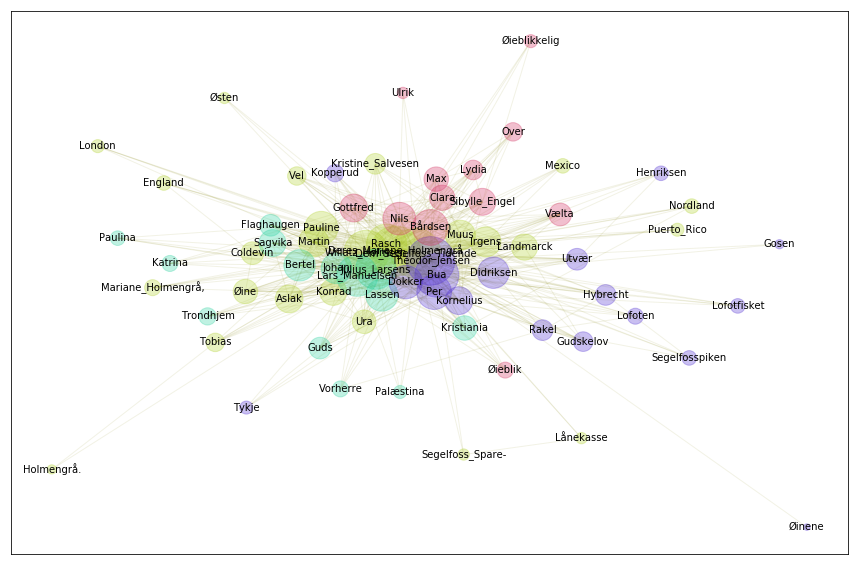

In [60]:
gnl.show_graph(G)

In [ ]:
gnl.show_communities(G)